# <b>Kaggle Learn</b>
# 11. Feature Engineering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision = 4, suppress = True)
from pandas import Series, DataFrame
%matplotlib inline

## 1. What Is Feature Engineering

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('input/concrete.csv')
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
X = df.copy()
y = X.pop('CompressiveStrength')

# Train and score baseline model
baseline = RandomForestRegressor(criterion = 'absolute_error', random_state = 0)
baseline_score = cross_val_score(baseline, X, y, cv = 5,
                                 scoring = 'neg_mean_absolute_error')
baseline_score = -1 * baseline_score.mean()

print(f'MAE baseline score: {baseline_score:.4}')

MAE baseline score: 8.232


In [7]:
X = df.copy()
y = X.pop('CompressiveStrength')

# Create synthetic features
X['FCRatio'] = X['FineAggregate'] / X['CoarseAggregate']
X['AggCmtRatio'] = (X['CoarseAggregate'] + X['FineAggregate']) / X['Cement']
X['WtrCmtRatio'] = X['Water'] / X['Cement']

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion = 'absolute_error', random_state = 0)
score = cross_val_score(model, X, y, cv = 5,
                        scoring = 'neg_mean_absolute_error')
score = -1 * score.mean()

print(f'MAE score with ratio features: {score:.4}')

MAE score with ratio features: 7.948


## 2. Mutual Information

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

In [9]:
df = pd.read_csv('input/autos.csv')
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [10]:
X = df.copy()
y = X.pop('price')

# Label encoding for categoricals
for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [15]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name = 'MI Scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3] # show a few features with their MI scores

curb_weight          0.914858
highway_mpg          0.873439
length               0.611739
fuel_system          0.470573
drive_wheels         0.332973
symboling            0.229686
compression_ratio    0.100190
fuel_type            0.047298
Name: MI Scores, dtype: float64

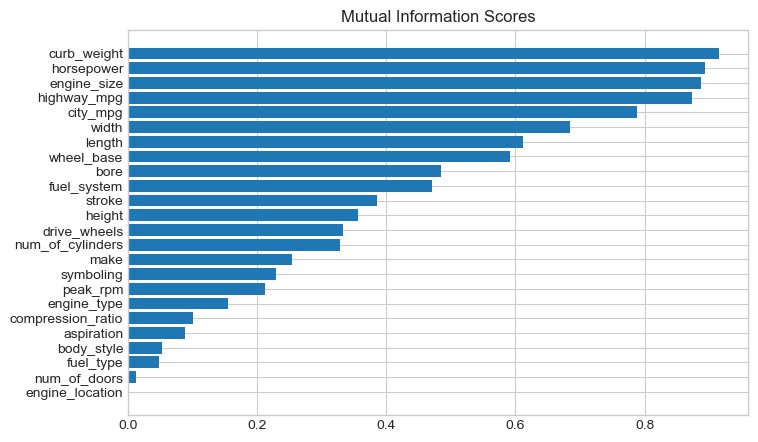

In [16]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi = 100, figsize = (8, 5))
plot_mi_scores(mi_scores)

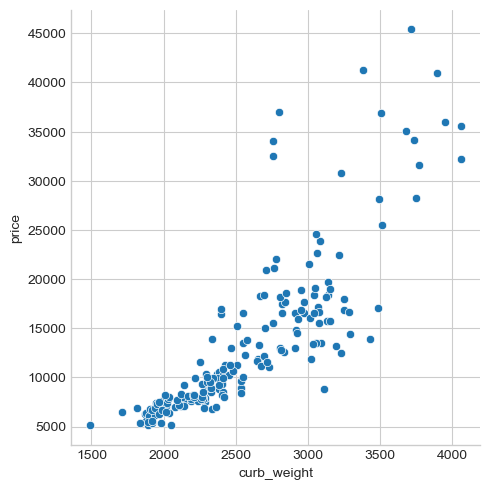

In [17]:
sns.relplot(x = 'curb_weight', y = 'price', data = df);

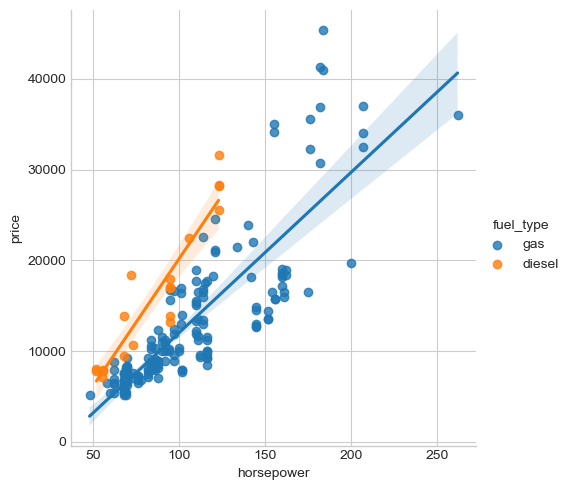

In [21]:
sns.lmplot(x = 'horsepower', y = 'price', hue = 'fuel_type', data = df);

## 3. Creating Features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True)
plt.rc(
    "axes",
    labelweight = "bold",
    labelsize = "large",
    titleweight = "bold",
    titlesize = 14,
    titlepad = 10,
)

In [4]:
accidents = pd.read_csv('input/accidents.csv')
autos = pd.read_csv('input/autos.csv')
concrete = pd.read_csv('input/concrete.csv')
customer = pd.read_csv('input/customer.csv')

In [5]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [10]:
print(f'The autos.csv dataset has {autos.shape[1]} columns and {autos.shape[0]} rows.')

The autos.csv dataset has 25 columns and 193 rows.


In [11]:
autos['stroke_ratio'] = autos['stroke'] / autos['bore']

autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [16]:
autos['displacement'] = (np.pi * ((0.5 * autos['bore']) ** 2) * autos['stroke'] * autos['num_of_cylinders'])

In [21]:
list(autos.columns)

['symboling',
 'make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_type',
 'num_of_cylinders',
 'engine_size',
 'fuel_system',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price',
 'stroke_ratio',
 'displacement']

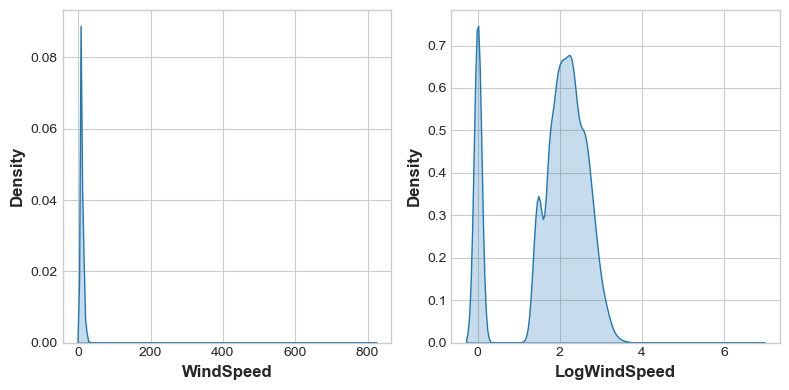

In [22]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents['WindSpeed'].apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
sns.kdeplot(accidents['WindSpeed'], shade = True, ax = axs[0])
sns.kdeplot(accidents['LogWindSpeed'], shade = True, ax = axs[1]);

In [26]:
accidents.shape

(100000, 30)

In [32]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,2.833213
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,2.322388
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,2.208274
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,1.916923
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,2.079442


In [49]:
import pandas as pd

# Assuming 'accidents' is your DataFrame containing the 'WindSpeed' column
# First, let's check unique values of 'WindSpeed'
unique_wind_speeds = accidents['WindSpeed'].unique()

# Sort unique wind speeds
unique_wind_speeds_sorted = np.sort(unique_wind_speeds)

# Now, let's count the occurrences of each unique wind speed
wind_speed_counts = accidents['WindSpeed'].value_counts()

# Print the sorted unique wind speeds and their respective counts
for wind_speed in unique_wind_speeds_sorted:
    count = wind_speed_counts.get(wind_speed, 0)  # Get count for the wind speed
    print(f"{wind_speed}: {count}")

0.0: 17513
1.0: 4
1.2: 16
2.0: 10
2.3: 30
3.0: 3550
3.5: 5857
4.6: 6347
5.0: 3753
5.8: 6302
6.0: 3589
6.9: 5896
7.0: 3377
8.0: 2977
8.1: 5249
9.0: 2675
9.2: 4752
10.0: 2119
10.4: 3778
11.5: 3413
12.0: 1921
12.7: 2570
13.0: 1453
13.8: 2041
14.0: 1185
15.0: 2451
16.0: 646
16.1: 1202
17.0: 551
17.3: 966
18.0: 394
18.4: 660
19.6: 515
20.0: 292
20.7: 377
21.0: 185
21.9: 240
22.0: 151
23.0: 312
24.0: 72
24.2: 125
25.0: 55
25.3: 83
26.0: 33
26.5: 51
27.6: 43
28.0: 33
28.8: 27
29.0: 14
29.9: 24
30.0: 12
31.0: 3
31.1: 23
32.0: 9
32.2: 7
33.0: 5
33.4: 13
34.5: 5
35.0: 6
35.7: 2
36.0: 5
36.8: 7
37.0: 4
38.0: 6
39.1: 2
40.0: 2
43.7: 1
46.0: 1
52.0: 1
58.0: 1
100.1: 1
114.0: 1
123.1: 1
230.0: 1
518.0: 1
822.8: 1


In [25]:
accidents[['WindSpeed', 'LogWindSpeed']].head(20)

,WindSpeed,LogWindSpeed
0,16.0,2.833213
1,9.2,2.322388
2,8.1,2.208274
3,5.8,1.916923
4,7.0,2.079442
5,9.0,2.302585
6,12.7,2.617396
7,0.0,0.000000
8,9.2,2.322388
9,3.0,1.386294


In [50]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents['RoadwayFeatures'] = accidents[roadway_features].sum(axis = 1)
accidents[roadway_features + ['RoadwayFeatures']].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [55]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete['Components'] = concrete[components].gt(0).sum(axis = 1)
concrete[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [60]:
customer[['Type', 'Level']] = customer['Policy'].str.split(" ", expand = True)
customer[['Policy', 'Type', 'Level']].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [61]:
autos['make_and_style'] = autos['make'] + '_' + autos['body_style']
autos[['make', 'body_style', 'make_and_style']].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [63]:
customer['AverageIncome'] = customer.groupby('State')['Income'].transform('mean')
customer[['State', 'Income', 'AverageIncome']].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [64]:
customer['StateFreq'] = customer.groupby('State')['State'].transform('count') / customer['State'].count()
customer[['State', 'StateFreq']].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [66]:
# Create splits
df_train = customer.sample(frac = 0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train['AverageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

# Merge the values into the validation set
df_valid = df_valid.merge(df_train[['Coverage', 'AverageClaim']]
                          .drop_duplicates(), on = 'Coverage', how = 'left')

df_valid[['Coverage', 'AverageClaim']].head(10)

,Coverage,AverageClaim
0,Basic,378.975421
1,Extended,473.753489
2,Premium,649.878201
3,Basic,378.975421
4,Basic,378.975421
5,Basic,378.975421
6,Premium,649.878201
7,Basic,378.975421
8,Basic,378.975421
9,Basic,378.975421


## 4. Clustering With K-Means

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout = True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

df = pd.read_csv("input/housing.csv")
X = df.loc[:, ["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
X.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [5]:
# Create cluster feature
kmeans = KMeans(n_clusters = 6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')
X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,3


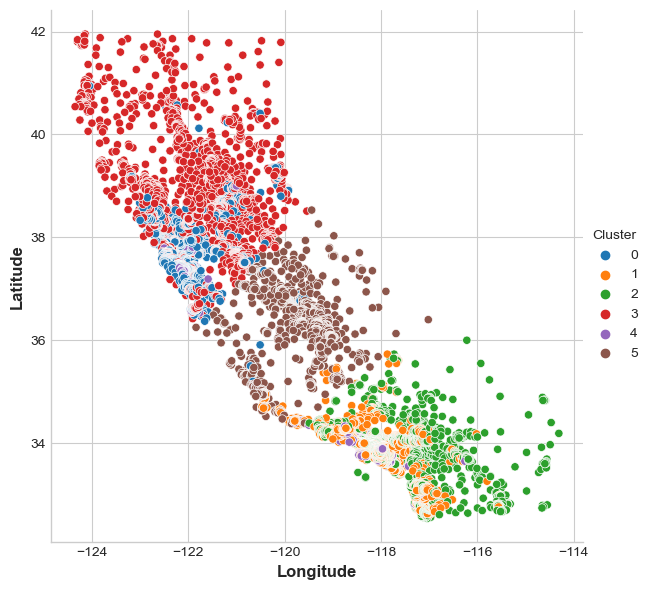

In [6]:
sns.relplot(x = 'Longitude', y = 'Latitude', hue = 'Cluster', data = X, height = 6);

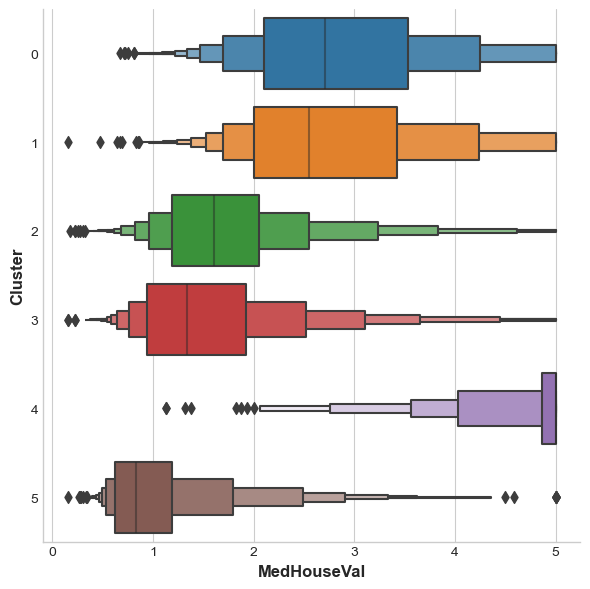

In [8]:
X['MedHouseVal'] = df['MedHouseVal']
sns.catplot(x = 'MedHouseVal', y = 'Cluster', data = X, kind = 'boxen', height = 6);

## 5. Principal Component Analysis